**Different Types of Classification Model on Titanic**

1.XGBoost         
2.CatBoost         
3.Stochastic Gradient Descent (SGD)         
4.Bagging (Bootstrap Aggregating)         
5.AdaBoost         
6.Gaussian Processes         
7.Quadratic Discriminant Analysis (QDA)         
8.Linear Discriminant Analysis (LDA)         
9.Naive Bayes         
10.K-Nearest Neighbour (KNN)        
11.Support Vector Machine (SVM)          
12.Gradient Boosting Machine (GBM)         
13.Random Forest         
14.Decision Trees         
15.Logistic Regression

**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score

*Reading the data from a CSV (Comma Separated Values) file named. The data is then stored in a pandas DataFrame called 'df'.
df.head() command displays the first 5 rows of the  dataset in tabular format. It allows you to quickly inspect the structure and content of the DataFrame and get an idea of the data it contains.*

In [2]:
df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Titanic\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

*Checking if there are null values*

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*filling empty values/null values with random values*

In [9]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

random_ages = np.random.normal(loc=mean_age, scale=std_age, size=df['Age'].isnull().sum())

df.loc[df['Age'].isnull(), 'Age'] = random_ages

df['Cabin'].fillna(''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), 3)), inplace=True)
random_embarked = np.random.choice(df['Embarked'].dropna(), df['Embarked'].isnull().sum())
df.loc[df['Embarked'].isnull(), 'Embarked'] = random_embarked

*Reverifying if there are null values*

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df.duplicated().sum()

0

*LabelEncoder is a class provided by the scikit-learn library in Python, and it is used for encoding categorical variables into numerical format. In machine learning, many algorithms require numerical data as input, and LabelEncoder helps convert categorical data, such as strings or class labels, into unique integer representations.*

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Sex']=le.fit_transform(df['Sex'])

In [14]:
x = df.drop(['Embarked','PassengerId'],axis=1)
y = df.Embarked


*The code performs data preprocessing and feature engineering to prepare the DataFrame df for machine learning. First, it drops several columns that are deemed unnecessary for the model, such as 'PassengerId', 'Name', 'Ticket', 'Cabin', and 'Embarked'. Then, it fills the missing values in the 'Age' column with the mean age of the passengers. Next, it applies one-hot encoding to convert categorical variables, such as 'Sex', into numerical format, creating dummy variables for each category. Finally, it separates the feature matrix x from the target vector y, with the target column being specified as 'Survived'. This processed data is now ready to be used for training and evaluating a machine learning model to predict survival outcomes.*








In [15]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
df_cleaned = df.drop(columns_to_drop, axis=1)

# Fill missing values in the 'Age' column with the mean age
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)

# Convert categorical variables (e.g., 'Sex') to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Sex'])

# Now, specify the actual target column name, e.g., 'Survived'
target_column_name = 'Survived'
x = df_encoded.drop(target_column_name, axis=1)
y = df_encoded[target_column_name]

*The training set of features, which contains 67% of the original data.
The testing set of features, which contains the remaining 33% of the original data.These datasets are ready to be used for training and evaluating machine learning models.*

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

*LightGBM classifier is trained and evaluated on the given dataset.*

In [17]:

model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=5, num_leaves=100,random_state=42, verbosity=1)
# Train the model
model.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test), (x_train, y_train)],
    eval_metric='logloss'
)
# Get the training and testing accuracies
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)

# Print the accuracies
print('Training accuracy: {:.4f}'.format(train_accuracy))
print('Testing accuracy: {:.4f}'.format(test_accuracy))

[LightGBM] [Info] Number of positive: 222, number of negative: 374
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372483 -> initscore=-0.521578
[LightGBM] [Info] Start training from score -0.521578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
%pip install xgboost
%pip install catboost


**XGBOOST**:
*XGBoost stands for "Extreme Gradient Boosting," and it is an open-source machine learning library designed to perform gradient boosting. Gradient boosting is an ensemble learning technique that combines the predictions of multiple weak learners (typically decision trees) to create a strong learner. XGBoost is widely used for supervised learning tasks, including classification, regression, and ranking problems.*

*XGBOOST classifier is trained and evaluated on the given dataset.*

In [22]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the training and testing accuracies separately
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print('Training accuracy: {:.4f}'.format(train_accuracy))
print('Testing accuracy: {:.4f}'.format(test_accuracy))


Accuracy: 0.8
Training accuracy: 0.8893
Testing accuracy: 0.8000


**CATBOOST**: *CatBoost is a supervised machine learning method that is used by the Train Using AutoML tool and uses decision trees for classification and regression. As its name suggests, CatBoost has two main features, it works with categorical data (the Cat) and it uses gradient boosting (the Boost).*

*CATBOOST classifier is trained and evaluated on the given dataset.*

In [24]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
model.fit(x_train, y_train)

0:	learn: 0.6574593	total: 154ms	remaining: 15.3s
1:	learn: 0.6273903	total: 155ms	remaining: 7.6s
2:	learn: 0.6027589	total: 156ms	remaining: 5.04s
3:	learn: 0.5812346	total: 157ms	remaining: 3.76s
4:	learn: 0.5662663	total: 157ms	remaining: 2.99s
5:	learn: 0.5515237	total: 158ms	remaining: 2.48s
6:	learn: 0.5386716	total: 159ms	remaining: 2.12s
7:	learn: 0.5262082	total: 161ms	remaining: 1.85s
8:	learn: 0.5141303	total: 162ms	remaining: 1.64s
9:	learn: 0.5060701	total: 163ms	remaining: 1.47s
10:	learn: 0.4966731	total: 164ms	remaining: 1.32s
11:	learn: 0.4884476	total: 164ms	remaining: 1.2s
12:	learn: 0.4819815	total: 165ms	remaining: 1.1s
13:	learn: 0.4755578	total: 165ms	remaining: 1.01s
14:	learn: 0.4704664	total: 166ms	remaining: 942ms
15:	learn: 0.4641472	total: 167ms	remaining: 877ms
16:	learn: 0.4616685	total: 167ms	remaining: 817ms
17:	learn: 0.4560890	total: 168ms	remaining: 765ms
18:	learn: 0.4523058	total: 169ms	remaining: 719ms
19:	learn: 0.4484067	total: 169ms	remaining:

In [25]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8203389830508474
Training accuracy 0.8607
Testing accuracy 0.8203


**SGD CLASSIFIER**: *SGDClassifier (Stochastic Gradient Descent Classifier) is a linear classifier based on the stochastic gradient descent optimization algorithm. It is part of the scikit-learn library in Python and is used for solving binary and multiclass classification problems.*

In [29]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(x_train, y_train)

SGDClassifier()

In [30]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.7966101694915254
Training accuracy 0.7785
Testing accuracy 0.7966


**BAGGING CLASSIFIER**: *BaggingClassifier is an ensemble meta-estimator in scikit-learn that uses the bagging technique to improve the performance of base models (also called base estimators). Bagging stands for Bootstrap Aggregating, and it helps reduce overfitting and increase stability by averaging the predictions of multiple base models.*



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()
model = BaggingClassifier(base_model)
model.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.7898305084745763
Training accuracy 0.9698
Testing accuracy 0.7898


**ADABOOST CLASSIFIER**: *AdaBoostClassifier is an ensemble meta-estimator in scikit-learn that uses the boosting technique to improve the performance of weak base models (also called weak learners) by combining them into a strong model. AdaBoost stands for Adaptive Boosting.*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8
Training accuracy 0.8356
Testing accuracy 0.8000


**GAUSSIAN PROCESS CLASSIFIER**: *The GaussianProcessClassifier is a probabilistic classifier based on Gaussian Processes (GP) in scikit-learn. Gaussian Processes are a powerful non-parametric method used for supervised learning tasks like classification and regression.*

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier()
model.fit(x_train, y_train)

GaussianProcessClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.7254237288135593
Training accuracy 0.9530
Testing accuracy 0.7254


In [ ]:
%pip install tensorflow


**QUADRATIC DISCRIMINANT ANALYSIS**: *Quadratic Discriminant Analysis (QDA) is a classification algorithm that is an extension of Linear Discriminant Analysis (LDA). It is a supervised learning algorithm used for classification tasks where the goal is to assign class labels to input data points based on their features.*

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.6949152542372882
Training accuracy 0.6862
Testing accuracy 0.6949


**LINEAR DISCRIMINANT ANALYSIS**: *Linear Discriminant Analysis (LDA) is a classification algorithm and dimensionality reduction technique used for supervised learning tasks. It is primarily employed for multi-class classification problems, where the goal is to assign class labels to input data points based on their features.*

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8033898305084746
Training accuracy 0.7919
Testing accuracy 0.8034


**NAIVE BAYES**: *
Naive Bayes is a family of simple probabilistic classifiers based on Bayes' theorem with a strong assumption of independence between the features. Despite its simplicity, it has proven to be effective in various real-world applications, especially in text classification and spam filtering.*

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8101694915254237
Training accuracy 0.7970
Testing accuracy 0.8102


**KNN**: *K-Nearest Neighbors (KNN) is a popular and straightforward classification algorithm used for both binary and multiclass classification tasks.* 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.7152542372881356
Training accuracy 0.7802
Testing accuracy 0.7153


**SVC**: *Support Vector Machines is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks. SVM is particularly effective for binary classification problems but can be extended to handle multi-class classification as well.*

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.6711864406779661
Training accuracy 0.6728
Testing accuracy 0.6712


**GBM**: *Gradient Boosting Machines (GBM) is an ensemble learning technique that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. GBM is a popular and powerful machine learning algorithm used for both regression and classification tasks.*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8033898305084746
Training accuracy 0.8977
Testing accuracy 0.8034


**RANDOM FOREST**: *Random Forest is an ensemble learning method used for both classification and regression tasks. It belongs to the family of decision tree-based models and combines the predictions of multiple decision trees to make more accurate and robust predictions.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8067796610169492
Training accuracy 0.9883
Testing accuracy 0.8068


**DECISION TREE**: *A Decision Tree is a fundamental building block in the field of machine learning and is used for both classification and regression tasks. It is a tree-like model where each internal node represents a decision based on a feature, and each leaf node represents the outcome or prediction.*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.7593220338983051
Training accuracy 0.9883
Testing accuracy 0.7593


**LOGISTIC REGRESSION**: *Logistic Regression is a statistical method used for binary classification, where the goal is to predict the probability that an instance belongs to a particular class. Despite its name, logistic regression is actually a classification algorithm, not a regression algorithm.*

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Accuracy: 0.8067796610169492
Training accuracy 0.7869
Testing accuracy 0.8068


**PLOTING GRAPH OF EACH MODEL'S ACCURACY**

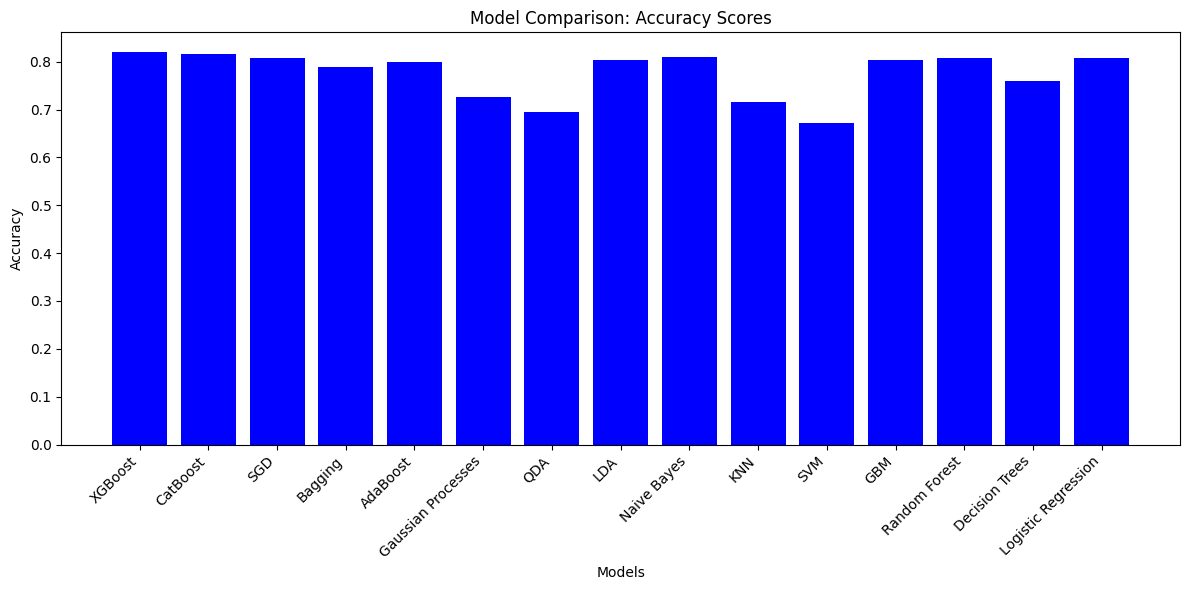

In [ ]:
import matplotlib.pyplot as plt

# Replace these accuracy scores with the provided values
model_accuracy = {
    'XGBoost': 0.8203389830508474,
    'CatBoost': 0.8169491525423729,
    'SGD': 0.8067796610169492,
    'Bagging': 0.7898305084745763,
    'AdaBoost': 0.8,
    'Gaussian Processes': 0.7254237288135593,
    'QDA': 0.6949152542372882,
    'LDA': 0.8033898305084746,
    'Naive Bayes': 0.8101694915254237,
    'KNN': 0.7152542372881356,
    'SVM': 0.6711864406779661,
    'GBM': 0.8033898305084746,
    'Random Forest': 0.8067796610169492,
    'Decision Trees': 0.7593220338983051,
    'Logistic Regression': 0.8067796610169492
}

# Convert the dictionary into two lists for labels and accuracy values
labels = list(model_accuracy.keys())
accuracy_values = list(model_accuracy.values())

# Plot the accuracy scores using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracy_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Highest Accuracy**: *From the graph, we can observe that the XGBoost model has the highest accuracy score (approximately 0.82) among the compared models.*

**Other Model Performances**: *The graph allows us to compare the performances of various models. For example, CatBoost, AdaBoost, LDA, and Logistic Regression have relatively high accuracy scores, while SVM, Gaussian Processes, and QDA have relatively lower accuracy scores.*

**COMPARING IN A TABULAR FORMAT**

In [ ]:

# Accuracy scores
accuracy_scores = {
    'Model': ['XGBoost', 'CatBoost', 'Stochastic Gradient Descent (SGD)', 'Bagging (Bootstrap Aggregating)',
              'AdaBoost', 'Gaussian Processes', 'QDA', 'LDA', 'Naive Bayes', 'KNN', 'SVM', 'GBM',
              'Random Forest', 'Decision Trees', 'Logistic Regression'],
    'Accuracy Score': [0.8203, 0.8169, 0.8068, 0.7898, 0.8000, 0.7254, 0.6949, 0.8034, 0.8102, 0.7153,
                       0.6712, 0.8034, 0.8068, 0.7593, 0.8068]
}

df = pd.DataFrame(accuracy_scores)
df


,Model,Accuracy Score
0,XGBoost,0.8203
1,CatBoost,0.8169
2,Stochastic Gradient Descent (SGD),0.8068
3,Bagging (Bootstrap Aggregating),0.7898
4,AdaBoost,0.8000
5,Gaussian Processes,0.7254
6,QDA,0.6949
7,LDA,0.8034
8,Naive Bayes,0.8102
9,KNN,0.7153
